In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from scipy import stats

In [ ]:
df=pd.read_csv("/content/salaries.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.660011e+05,150028.812124,33.334526
std,0.687612,3.661545e+05,68634.306349,46.682931
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
colum=df.columns

In [ ]:
colum

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
for i in colum:
  print(df[i].unique())
  print("_________________")


[2024 2023 2022 2020 2021]
_________________
['SE' 'MI' 'EN' 'EX']
_________________
['FT' 'CT' 'PT' 'FL']
_________________
['AI Engineer' 'Machine Learning Engineer'
 'Business Intelligence Developer' 'Data Engineer' 'Data Scientist'
 'Cloud Database Engineer' 'Research Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Applied Scientist' 'Data Science Manager'
 'Research Scientist' 'Prompt Engineer' 'Data Science'
 'Data Science Consultant' 'Data Management Analyst' 'Research Analyst'
 'Data Operations Analyst' 'Data Management Consultant'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Manager' 'ML Engineer'
 'Robotics Software Engineer' 'Machine Learning Researcher' 'AI Architect'
 'Data DevOps Engineer' 'Business Intelligence' 'AI Software Engineer'
 'Data Integration Engineer' 'Data Operations Specialist' 'BI Analyst'
 'Data Product Manager' 'Business Intelligence Engineer' 'Data Specialist'
 'AI Research Scientist' 'Data

In [ ]:
new_job_title = {'Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Researcher': 'ML Engineer',
                                           'Machine Learning Research Engineer': 'ML Engineer',
                                           'MLOps Engineer' : 'ML Engineer',
                                           'ML Ops Engineer' : 'ML Engineer',
                                           'Lead Machine Learning Engineer' : 'ML Engineer',
                                           'Head of Machine Learning' : 'ML Engineer',
                                           'Machine Learning Operations Engineer' : 'ML Engineer',
                                           'Machine Learning Infrastructure Engineer' : 'ML Engineer',
                                           'Machine Learning Modeler' : 'ML Engineer',
                                           'Machine Learning Software Engineer' : 'ML Engineer',
                                           'Applied Machine Learning Scientist' : 'ML Engineer',
                                           'Machine Learning Manager' : 'ML Engineer',
                                           'Principal Machine Learning Engineer' : 'ML Engineer',
                                           'Staff Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Specialist' : 'ML Engineer',
                                           'Machine Learning Developer' : 'ML Engineer',
                                           'Applied Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Scientist' : 'ML Engineer',

                                           'Data Management Analyst' : 'Data Analyst',
                                           'Data Operations Analyst' : 'Data Analyst',
                                           'Data Quality Analyst' : 'Data Analyst',
                                           'Admin & Data Analyst' : 'Data Analyst',
                                           'Data Analyst Lead' : 'Data Analyst',
                                           'Lead Data Analyst' : 'Data Analyst',
                                           'Business Data Analyst' : 'Data Analyst',
                                           'Financial Data Analyst' : 'Data Analyst',
                                           'Staff Data Analyst' : 'Data Analyst',
                                           'Business Intelligence Data Analyst' : 'Data Analyst',
                                           'Finance Data Analyst' : 'Data Analyst',
                                           'Compliance Data Analyst' : 'Data Analyst',
                                           'Product Data Analyst' : 'Data Analyst',
                                           'Data Visualization Analyst' : 'Data Analyst',
                                           'Sales Data Analyst' : 'Data Analyst',
                                           'Marketing Data Analyst' : 'Data Analyst',
                                           'Principal Data Analyst' : 'Data Analyst',

                                           'Data Science Manager' : 'Data Science',
                                           'Data Science Consultant' : 'Data Science',
                                           'Data Science Director' : 'Data Science',
                                           'Data Science Engineer' : 'Data Science',
                                           'Data Science Practitioner' : 'Data Science',
                                           'Data Science Lead' : 'Data Science',
                                           'Director of Data Science' : 'Data Science',
                                           'Managing Director Data Science' : 'Data Science',
                                           'Head of Data Science' : 'Data Science',
                                           'Data Science Tech Lead' : 'Data Science',

                                           'Marketing Data Scientist' : 'Data Scientist',
                                           'Principal Data Scientist' : 'Data Scientist',
                                           'Applied Data Scientist' : 'Data Scientist',
                                           'Lead Data Scientist' : 'Data Scientist',
                                           'Staff Data Scientist' : 'Data Scientist',
                                           'Data Scientist Lead' : 'Data Scientist',

                                           'AI Architect' : 'AI Engineer',
                                           'AI Software Engineer' : 'AI Engineer',
                                           'AI Research Scientist' : 'AI Engineer',
                                           'AI Research Engineer' : 'AI Engineer',
                                           'AI Programmer' : 'AI Engineer',
                                           'AI Product Manager' : 'AI Engineer',
                                           'AI Developer' : 'AI Engineer',
                                           'AI Scientist' : 'AI Engineer'}


In [ ]:
df['job_title'] = df['job_title'].replace(new_job_title)

In [ ]:
df['job_title'].unique()

array(['AI Engineer', 'ML Engineer', 'Business Intelligence Developer',
       'Data Engineer', 'Data Scientist', 'Cloud Database Engineer',
       'Research Engineer', 'Data Analyst', 'Applied Scientist',
       'Data Science', 'Research Scientist', 'Prompt Engineer',
       'Research Analyst', 'Data Management Consultant',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Data Architect', 'Data Manager', 'Robotics Software Engineer',
       'Data DevOps Engineer', 'Business Intelligence',
       'Data Integration Engineer', 'Data Operations Specialist',
       'BI Analyst', 'Data Product Manager',
       'Business Intelligence Engineer', 'Data Specialist',
       'Data Strategist', 'Big Data Developer', 'BI Developer',
       'Quantitative Research Analyst', 'Data Infrastructure Engineer',
       'Data Analytics Lead', 'Business Intelligence Manager',
       'Data Analytics Manager', 'Data Developer',
       'Data Analytics Consultant', 'Data Analytics Specialist'

In [ ]:
df['job_title'].value_counts()

job_title
Data Engineer               3017
Data Scientist              2911
Data Analyst                2190
ML Engineer                 1882
Data Science                 471
                            ... 
Manager Data Management        1
Principal Data Architect       1
Consultant Data Engineer       1
Cloud Data Architect           1
Power BI Developer             1
Name: count, Length: 86, dtype: int64

In [ ]:
continuous_columns = ['salary', 'salary_in_usd']
category_columns = ['work_year', 'experience_level', 'employment_type', 'job_title',
                    'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

In [ ]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)



In [ ]:
res=[]
for i in continuous_columns:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,salary,166001.133696,182610.010,H0-There is no significant difference,-0.163511,0.870176
1,salary_in_usd,150028.812124,143757.782,H0-There is no significant difference,-1.570928,0.116766


In [ ]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [ ]:
columns=continuous_columns
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,salary&salary_in_usd,Ha-There is significant difference,2.995395,0.002753,H0-There is no significant difference,-0.202259,0.841983


In [ ]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is no relationship between two mentioned column" })
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is relationship between two mentioned column" })

  return result

In [ ]:
Category=category_columns
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.set_option('max_colwidth', None)
pd.DataFrame(res2)

,column,chi_square_test
0,work_year&experience_level,There is relationship between two mentioned column
1,work_year&employment_type,There is relationship between two mentioned column
2,work_year&job_title,There is relationship between two mentioned column
3,work_year&salary_currency,There is relationship between two mentioned column
4,work_year&employee_residence,There is relationship between two mentioned column
5,work_year&remote_ratio,There is relationship between two mentioned column
6,work_year&company_location,There is relationship between two mentioned column
7,work_year&company_size,There is relationship between two mentioned column
8,experience_level&employment_type,There is relationship between two mentioned column
9,experience_level&job_title,There is relationship between two mentioned column


In [ ]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result

In [ ]:
Category=category_columns
continous=continuous_columns
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,Annova_test
0,salary&work_year,There is no relationship between mentioned column
1,salary&experience_level,There is no relationship between mentioned column
2,salary&employment_type,There is relationship between mentioned column
3,salary&job_title,There is no relationship between mentioned column
4,salary&salary_currency,There is no relationship between mentioned column
5,salary&employee_residence,There is no relationship between mentioned column
6,salary&remote_ratio,There is no relationship between mentioned column
7,salary&company_location,There is no relationship between mentioned column
8,salary&company_size,There is no relationship between mentioned column
9,salary_in_usd&work_year,There is no relationship between mentioned column


**Data Visualization**

In [ ]:
fig = px.scatter(df, x="work_year", y="salary_in_usd")
fig.update_xaxes(tickvals=[2020,2021,2022, 2023, 2024])
fig.show()

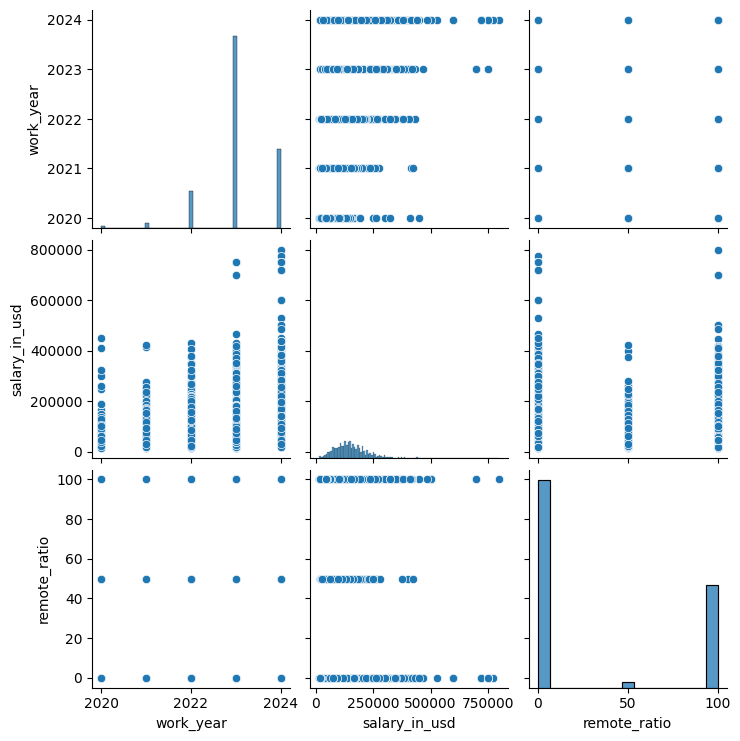

In [ ]:
sns.pairplot(df[['work_year', 'salary_in_usd', 'remote_ratio', 'company_size']])
plt.show()

In [ ]:
fig = px.box (df,x="employment_type",y="salary_in_usd")
fig.show()

In [ ]:
fig=px.sunburst(df,path=["work_year","experience_level","employment_type","remote_ratio","company_size"],values="salary_in_usd")
fig.show()



**Data Preprocessing**

In [ ]:
columns=['experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence',
       'company_location', 'company_size']

In [ ]:
encode=OrdinalEncoder()
for i in columns:
  df[i]=encode.fit_transform(df[[i]])

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,3.0,2.0,0.0,90000,21.0,90000,1.0,0,1.0,0.0
1,2024,3.0,2.0,71.0,180500,21.0,180500,84.0,0,74.0,1.0
2,2024,3.0,2.0,71.0,96200,21.0,96200,84.0,0,74.0,1.0
3,2024,3.0,2.0,71.0,235000,21.0,235000,6.0,0,6.0,1.0
4,2024,3.0,2.0,71.0,175000,21.0,175000,6.0,0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
13967,2020,3.0,2.0,57.0,412000,21.0,412000,84.0,100,74.0,0.0
13968,2021,2.0,2.0,57.0,151000,21.0,151000,84.0,100,74.0,0.0
13969,2020,0.0,2.0,57.0,105000,21.0,105000,84.0,100,74.0,2.0
13970,2020,0.0,0.0,27.0,100000,21.0,100000,84.0,100,74.0,0.0


In [ ]:
x = df.drop(["salary", "salary_currency", "salary_in_usd"], axis = 1)
y = df["salary_in_usd"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [ ]:
model=RandomForestRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

2928957016.467984

In [ ]:
input = np.array([[2024, 2, 3, 24, 85, 50, 66, 0]])
prediction = model.predict(input)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([94042.79360892])

In [ ]:
model1=AdaBoostRegressor().fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred1)
mse

3810500703.2578664

In [ ]:
input = np.array([[2024, 2, 3, 24, 85, 50, 66, 0]])
prediction = model1.predict(input)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostRegressor was fitted with feature names



array([153955.93219927])